In [18]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# Download latest version
path = kagglehub.dataset_download("uciml/iris")

In [20]:
csv_file = "/root/.cache/kagglehub/datasets/uciml/iris/versions/2/Iris.csv"
data = pd.read_csv(csv_file)
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [21]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = data['Species']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [23]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [24]:
y_pred = model.predict(X_test)
print(y_pred)

['Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa']


In [25]:
acc = accuracy_score(Y_test, y_pred)
report = classification_report(Y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", report)

Accuracy: 1.0

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [27]:
new_data = pd.DataFrame({
    'SepalLengthCm': [5.1, 6.7, 4.9],
    'SepalWidthCm': [3.5, 3.0, 3.1],
    'PetalLengthCm': [1.4, 5.2, 1.5],
    'PetalWidthCm': [0.2, 2.3, 0.1]
})

print(model.predict(new_data))

['Iris-setosa' 'Iris-virginica' 'Iris-setosa']


Blue ones are no 
Red ones are yes

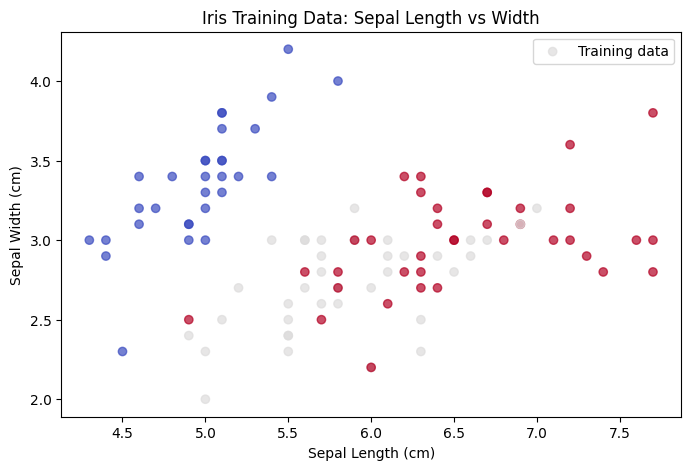

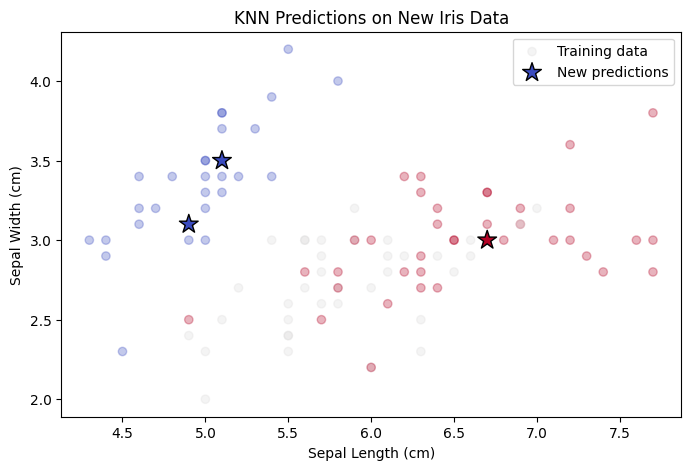

In [29]:
# Training data
plt.figure(figsize=(8,5))
plt.scatter(X_train['SepalLengthCm'], X_train['SepalWidthCm'],
            c=Y_train.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}),
            cmap='coolwarm', label='Training data', alpha=0.7)
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Iris Training Data: Sepal Length vs Width")
plt.legend()
plt.show()

# New data + predictions
plt.figure(figsize=(8,5))
plt.scatter(X_train['SepalLengthCm'], X_train['SepalWidthCm'],
            c=Y_train.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}),
            cmap='coolwarm', alpha=0.3, label='Training data')

# convert numpy predictions to a pandas Series and map to numeric colors
label_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
pred_colors = pd.Series(model.predict(new_data)).map(label_map)

plt.scatter(new_data['SepalLengthCm'], new_data['SepalWidthCm'],
            c=pred_colors,
            cmap='coolwarm', marker='*', s=200, edgecolors='black', label='New predictions')

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("KNN Predictions on New Iris Data")
plt.legend()
plt.show()